# Image Comparison
>  For the final chapter, you'll need to use your brain... and hundreds of others! Drawing data from more than 400 open-access MR images, you'll learn the basics of registration, resampling, and image comparison. Then, you'll use the extracted measurements to evaluate the effect of Alzheimer's Disease on brain structure.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 4 exercises "Biomedical Image Analysis in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [2]:
import imageio
import numpy as np
import pandas as pd
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

## Spatial transformations

### Translations

<div class=""><p>In this chapter, we'll leverage data use data from the <a href="https://www.oasis-brains.org/" target="_blank" rel="noopener noreferrer">Open Access Series of Imaging Studies</a> to compare the brains of different populations: young and old, male and female, healthy and diseased. </p>
<p>To start, center a single slice of a 3D brain volume (<code>im</code>). First, find the center point in the image array and the center of mass of the brain. Then, translate the image to the center.</p>
<p>This chapter's exercises have all had the following imports:</p>
<pre><code>import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
</code></pre></div>

In [39]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/3-skill-tracks/biomedical-image-analysis-in-python/data/OAS1_0069.T1.130tr.npy
im = np.load("OAS1_0069.T1.130tr.npy")

In [40]:
def format_and_render_plot():
    '''Custom function to simplify common formatting operations for exercises. 
    Operations include: 
    1. Looping through `fig.axes` and turning off axis grid.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.'''
    fig = plt.gcf()
    for ax in fig.axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Instructions 1/2
<ul>
<li>Find the center-point of <code>im</code> using <code>ndi.center_of_mass()</code>.</li>
<li>Calculate the distance from the image center (<code>128, 128</code>), along each axis.</li>
<li>Use <code>ndi.shift()</code> to shift the data.</li>
</ul>

In [41]:
# Find image center of mass
com = ndi.center_of_mass(im)

# Calculate amount of shift needed
d0 = 128 - com[0]
d1 = 128 - com[1]

# Translate the brain towards the center
xfm = ndi.shift(im, shift=[d0, d1])

Instructions 2/2
<p>Plot the original and shifted data. First, create an array of subplots with two rows and one column. Then, draw <code>im</code> and <code>xfm</code> on the first and second subplots.</p>

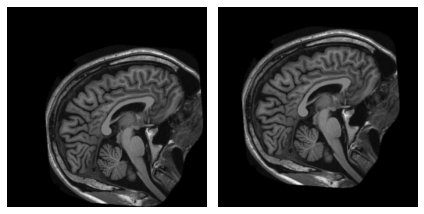

In [45]:
# Plot the original and adjusted images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im, cmap="gray")
axes[1].imshow(xfm, cmap="gray")
format_and_render_plot()

**You can shift your image in as many directions as there are image dimensions.**

### Rotations

<div class=""><p>In cases where an object is angled or flipped, the image can be rotated. Using <code>ndi.rotate()</code>, the image is rotated from its center by the specified degrees from the right horizontal axis.</p>
<p>
  <img src="https://assets.datacamp.com/production/repositories/2085/datasets/2d79444a82408cfbc8c9e3c1f8da766d2d056ee0/Ch4_L1_Rotated-Head.png" width="35%">
</p>
<p>For this exercise, shift and rotate the brain image (<code>im</code>) so that it is roughly level and "facing" the right side of the image.</p></div>

Instructions
<ul>
<li>Shift <code>im</code> towards the center: 20 pixels left and 20 pixels up.</li>
<li>Use <code>ndi.rotate</code> to turn <code>xfm</code> 30 degrees downward. Set <code>reshape=False</code> to prevent the image shape from changing.</li>
<li>Plot the original and transformed images.</li>
</ul>

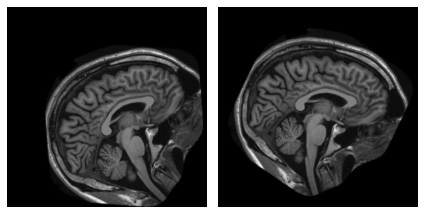

In [49]:
# Shift the image towards the center
xfm = ndi.shift(im, shift=[-20, -20])

# Rotate the shifted image
xfm = ndi.rotate(xfm, angle=-30, reshape=False)

# Plot the original and rotated images
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im, cmap="gray")
axes[1].imshow(xfm, cmap="gray")
format_and_render_plot()

**The order of transformations makes a difference: rotating the image first will alter the object center, changing the amount of shift needed.**

### Affine transform

<div class=""><p>An affine transformation matrix provides directions for up to four types of changes: translating, rotating, rescaling and shearing. The elements of the matrix map the coordinates from the input array to the output.</p>
<p>
  <img src="https://assets.datacamp.com/production/repositories/2085/datasets/e807bc1ad34e35ac264fd494ab24bae2a8c3a12b/Ch4_L3_Transformations.png" alt="Encoded transformations within a matrix" width="35%">
</p>
<p>For this exercise, use <code>ndi.affine_transform()</code> to apply the following registration matrices to <code>im</code>. Which one does the best job of <strong>centering, leveling and enlarging</strong> the original image?</p></div>

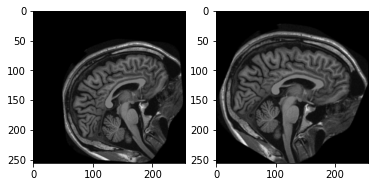

In [51]:
mat = [[0.8, -0.4, 90], [0.4, 0.8, -6.0], [0, 0, 1]]
xfm = ndi.affine_transform(im, mat)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im, cmap="gray")
axes[1].imshow(xfm, cmap="gray")
plt.show()

<pre>
Possible Answers
[[1, 0, 0], [0, 1, 0], [0, 0, 1]]
[[1.5, -0.8, 60], [0.8, 1.5, -140], [0, 0, 1]]
[[1, -0.3, 60], [-0.3, 1, 60], [0, 0, 1]]
<b>[[0.8, -0.4, 90], [0.4, 0.8, -6.0], [0, 0, 1]]</b>
</pre>

**To implement matrix transformations in your workflow, you will likely want to use more advanced tools, such as those in scikit-image. The package's website has some nice tutorials. Also, note that 3D images require different size transformation matrices.**

## Resampling and interpolation

### Resampling

<div class=""><p>Images can be collected in a variety of shapes and sizes. <em>Resampling</em> is a useful tool when these shapes need to be made consistent. Two common applications are: </p>
<ul>
<li><strong>Downsampling</strong>: combining pixel data to <em>decrease</em> size</li>
<li><strong>Upsampling</strong>: distributing pixel data to <em>increase</em> size </li>
</ul>
<p>For this exercise, transform and then resample the brain image (<code>im</code>) to see how it affects image shape.</p></div>

Instructions
<ul>
<li>Shift <code>im</code> 20 pixels left and 20 pixels up, i.e. <code>(-20, -20)</code>. Then, rotate it 35 degrees downward. Remember to specify a value for <code>reshape</code>.</li>
<li>Use <code>ndi.zoom()</code> to downsample the image from (256, 256) to (64, 64).</li>
<li>Use <code>ndi.zoom()</code> to upsample the image from (256, 256) to (1024, 1024). </li>
<li>Plot the resampled images.</li>
</ul>

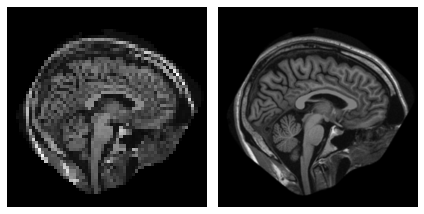

In [53]:
# Center and level image
xfm = ndi.shift(im, shift=(-20, -20))
xfm = ndi.rotate(xfm, angle=-35, reshape=False)

# Resample image
im_dn = ndi.zoom(xfm, zoom=0.25)
im_up = ndi.zoom(xfm, zoom=4)

# Plot the images
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im_dn, cmap="gray")
axes[1].imshow(im_up, cmap="gray")
format_and_render_plot()

**You can also resample data along a single dimension by passing a tuple: e.g. ndi.zoom(im, zoom=(2,1,1)). This can be useful for making voxels cubic.**

### Interpolation

<div class=""><p><em>Interpolation</em> is how new pixel intensities are estimated when an image transformation is applied. It is implemented in SciPy using <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html" target="_blank" rel="noopener noreferrer">sets of spline functions</a>.</p>
<p>Editing the interpolation <code>order</code> when using a function such as <code>ndi.zoom()</code> modifies the resulting estimate: higher orders provide more flexible estimates but take longer to compute.</p>
<p>For this exercise, upsample <code>im</code> and investigate the effect of different interpolation orders on the resulting image.</p></div>

In [65]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/3-skill-tracks/biomedical-image-analysis-in-python/data/OAS1_0351.T1.npz
im = np.load("OAS1_0351.T1.npz")
im = im.f.arr_0[64]

In [55]:
def format_and_render_plots():
    '''Custom function to simplify common formatting operations for exercises. Operations include: 
    1. Looping through `fig.axes` and turning off axis grid.
    2. Calling `plt.tight_layout` to improve subplot spacing.
    3. Calling `plt.show()` to render plot.'''
    fig = plt.gcf()
    for ax in fig.axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Instructions
<ul>
<li>Use <code>ndi.zoom()</code> to upsample <code>im</code> from a shape of <code>128, 128</code> to <code>512, 512</code> twice. First, use an interpolation <code>order</code> of 0, then set <code>order</code> to 5.</li>
<li>Print the array shapes of <code>im</code> and <code>up0</code>.</li>
<li>Plot close-ups of the images. Use the index range <code>128:256</code> along each axis.</li>
</ul>

Original shape: (128, 128)
Upsampled shape: (512, 512)


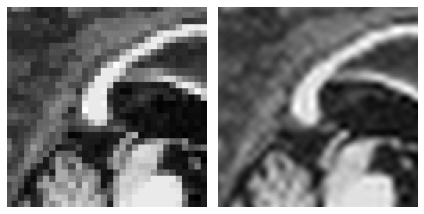

In [75]:
# Upsample "im" by a factor of 4
up0 = ndi.zoom(im, zoom=4, order=0)
up5 = ndi.zoom(im, zoom=4, order=5)

# Print original and new shape
print('Original shape:', im.shape)
print('Upsampled shape:', up0.shape)

# Plot close-ups of the new images
fig, axes = plt.subplots(1, 2)
axes[0].imshow(up0[128:256, 128:256], cmap='gray')
axes[1].imshow(up5[128:256, 128:256], cmap='gray')
format_and_render_plots()

**The key trade-off is that more complex interpolation methods require greater computational resources. This can take a heavy toll when analyzing 3D volumes.**

## Comparing images

### Mean absolute error

<div class=""><p><em>Cost functions</em> and <em>objective functions</em> output a single value that summarizes how well two images match. </p>
<p>The <strong>mean absolute error</strong> (MAE), for example, summarizes intensity differences between two images, with higher values indicating greater divergence.</p>
<p>For this exercise, calculate the mean absolute error between <code>im1</code> and <code>im2</code> step-by-step.</p></div>

In [77]:
%%capture
!wget https://github.com/lnunesAI/Datacamp/raw/main/3-skill-tracks/biomedical-image-analysis-in-python/data/OAS1_0249.1.brain.116.npy
!wget https://github.com/lnunesAI/Datacamp/raw/main/3-skill-tracks/biomedical-image-analysis-in-python/data/OAS1_0249.2.brain.116.npy
im1 = np.load("OAS1_0249.1.brain.116.npy")
im2 = np.load("OAS1_0249.2.brain.116.npy")

In [79]:
def format_and_render_plot():
    '''Custom function to simplify common formatting operations for exercises.'''

    from mpl_toolkits.axes_grid1 import make_axes_locatable

    fig = plt.gcf()
    ax = fig.axes[0]
    ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(ax.get_images()[0], cax=cax)
    plt.show()

Instructions 1/3
<ul>
<li>Calculate the difference between <code>im1</code> and <code>im2</code>.</li>
<li>Plot <code>err</code> with the <code>seismic</code> colormap. To center the colormap at 0, set <code>vmin=-200</code> and <code>vmax=200</code>.</li>
</ul>

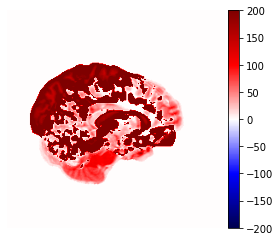

In [110]:
# Calculate image difference
err = im1 - im2

# Plot the difference
plt.imshow(err,  cmap="seismic", vmin=-200, vmax=200)
format_and_render_plot()

Instructions 2/3
<li>Compute the absolute error of the difference. Use <code>np.abs()</code>. Plot the image.</li>

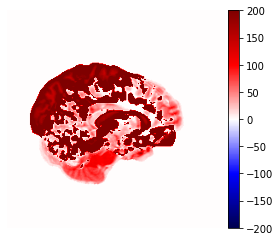

In [111]:
# Calculate absolute image difference
abs_err = np.abs(im1 - im2)

# Plot the difference
plt.imshow(abs_err, cmap='seismic', vmin=-200, vmax=200)
format_and_render_plot()

Instructions 3/3
<li>Find the cost value using <code>np.mean()</code>.</li>

In [112]:
# Calculate mean absolute error
mean_abs_err = np.mean(np.abs(im1 - im2))
print('MAE:', mean_abs_err)

MAE: 34.720550537109375


**The MAE metric allows for variations in weighting throughout the image, which gives areas with high pixel intensities more influence on the cost calculation than others.**

### Intersection of the union

<div class=""><p>Another cost function is the intersection of the union (IOU). The IOU is the number of pixels filled in both images (the <em>intersection</em>) out of the number of pixels filled in either image (the <em>union</em>).</p>
<p>For this exercise, determine how best to transform <code>im1</code> to <strong>maximize</strong> the IOU cost function with <code>im2</code>. We have defined the following function for you:</p>
<pre><code>def intersection_of_union(im1, im2):
    i = np.logical_and(im1, im2)
    u = np.logical_or(im1, im2)
    return i.sum() / u.sum()
</code></pre>
<p><em>Note: When using <code>ndi.rotate()</code>, remember to pass <code>reshape=False</code>, so that array shapes match.</em></p></div>

In [120]:
def intersection_of_union(im1, im2):
    i = np.logical_and(im1, im2)
    u = np.logical_or(im1, im2)
    return i.sum() / u.sum()

In [121]:
xfm = ndi.shift(im1, shift=(-10,-10))
xfm = ndi.rotate(xfm, angle=-15, reshape=False)
intersection_of_union(xfm, im2)

0.8913414634146342

<pre>
Possible Answers
<b>Shift (-10, -10), rotate -15 deg.</b>
Shift (10, 10), rotate -15 deg.
Shift (10, 10), rotate +15 deg.
Shift (-10, -10), rotate +15 deg.
</pre>

**Remember, the core principle is that a cost function must produce a single summary value across all elements in the image. MAE and IOU are just two of the many possible ways you might compare images.**

## Normalizing measurements

### Identifying potential confounds

<div class=""><p>Once measures have been extracted, double-check for dependencies within your data. This is especially true if any image parameters (sampling rate, field of view) might differ between subjects, or you pull multiple measures from a single image.</p>
<p>For the final exercises, we have combined demographic and brain volume measures into a pandas DataFrame (<code>df</code>). </p>
<p>First, you will explore the table and available variables. Then, you will check for correlations between the data.</p></div>

In [130]:
df = pd.read_csv("https://github.com/lnunesAI/Datacamp/raw/main/3-skill-tracks/biomedical-image-analysis-in-python/data/df_187_sample.csv")

Instructions 1/4
<p>Print three random rows in <code>df</code> using the <code>.sample()</code> method.</p>

In [131]:
# Print random sample of rows
print(df.sample(3))

    Unnamed: 0  age sex  alzheimers  brain_vol    skull_vol
96   OAS1_0244   80   F       False    823.442  1258.909295
81   OAS1_0212   74   F       False    948.803  1704.254383
100  OAS1_0256   70   M       False    999.734  1619.115348


Instructions 2/4
<p>Print the unique number of individuals with Alzheimer's disease patients.</p>

In [132]:
# Print prevalence of Alzheimer's Disease
print(df.alzheimers.value_counts())

False    94
True     93
Name: alzheimers, dtype: int64


Instructions 3/4
<p>Print the correlation table between each variable.</p>

In [133]:
# Print a correlation table
print(df.corr())

                 age  alzheimers  brain_vol  skull_vol
age         1.000000    0.037490  -0.328220   0.027456
alzheimers  0.037490    1.000000  -0.142961   0.162899
brain_vol  -0.328220   -0.142961   1.000000   0.690489
skull_vol   0.027456    0.162899   0.690489   1.000000


Instructions 4/4

<pre>
Possible Answers
T brain vol, alzheimers = -0.51
T brain vol, age = 0.16
<b>T brain vol, skull vol = 0.69</b>
</pre>

**There is a high correlation - nearly 0.7 - between the brain_vol and skull_vol. We should be wary of this (and other highly correlated variables) when interpreting results.**

### Testing group differences

<div class=""><p>Let's test the hypothesis that <em>Alzheimer's Disease is characterized by reduced brain volume.</em> </p>
<p>
  <img src="https://assets.datacamp.com/production/repositories/2085/datasets/3a3aa2597dc3222b9d63bdec36a89378125abd58/Ch4_L4_Alzheimers-Typical.png" alt="Sample Segmentations of Alzheimer's and Typical Subject" width="45%">
</p>
<p>We can perform a <strong>two-sample t-test</strong> between the brain volumes of elderly adults with and without Alzheimer's Disease. In this case, the two population samples are <em>independent</em> from each other because they are all separate subjects. </p>
<p>For this exercise, use the OASIS dataset (<code>df</code>) and <code>ttest_ind</code> to evaluate the hypothesis.</p></div>

Instructions 1/4
<p>Import <code>ttest_ind()</code> from <code>scipy.stats</code>.</p>

In [134]:
# Import independent two-sample t-test
from scipy.stats import ttest_ind

Instructions 2/4
<p>Create a vector of <code>'brain_vol'</code> values for each of the Alzheimer's Disease and Typical Elderly groups.</p>

In [135]:
# Select data from "alzheimers" and "typical" groups
brain_alz = df.loc[df.alzheimers == True, 'brain_vol']
brain_typ = df.loc[df.alzheimers == False, 'brain_vol']

Instructions 3/4
<p>Use <code>ttest_ind()</code> to test for differences between the two groups' <code>'gray_vol'</code> metrics. Print the results.</p>

In [136]:
# Perform t-test of "alz" > "typ"
results = ttest_ind(brain_alz, brain_typ)
print('t = ', results.statistic)
print('p = ', results.pvalue)

t =  -1.964660343195247
p =  0.05095104602834244


Instructions 4/4
<p>Visualize the <code>'brain_vol'</code> measures using the <code>boxplot()</code> method of <code>df</code>. Group the variables by their disease classification by setting <code>by='alzheimers'</code>.</p>

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


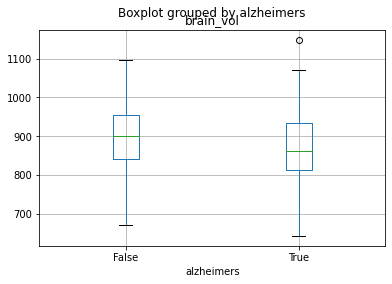

In [140]:
# Show boxplot of brain_vol differences
df.boxplot(column="brain_vol", by='alzheimers')
plt.show()

**There is some evidence for decreased brain volume in individuals with Alzheimer's Disease. Since the p-value for this t-test is greater than 0.05, we would not reject the null hypothesis that states the two groups are equal.**

### Normalizing metrics

<div class=""><p>We previously saw that there was not a significant difference between the brain volumes of elderly individuals with and without Alzheimer's Disease. </p>
<p>But could a correlated measure, such as "skull volume" be masking the differences?</p>
<p>For this exercise, calculate a new test statistic for the comparison of brain volume between groups, after adjusting for the subject's skull size.</p>
<hr>
<p>Using <code>results.statistic</code> and <code>results.pvalue</code> as your guide, answer the question: <strong>Is there strong evidence that Alzheimer's Disease is marked by smaller brain size, relative to skull size?</strong></p></div>

Instructions 1/2
<ul>
<li>Import <code>ttest_ind</code> from <code>scipy.stats</code>.</li>
<li>Divide each patient's <code>brain_vol</code> by their <code>skull_vol</code> to create a normalized measure.</li>
<li>Extract the adjusted brain measures from each group using <code>df.loc</code>. </li>
<li>Calculate the <em>t</em>-statistic and <em>p</em>-value using <code>ttest_ind</code>. Be sure to pass in <code>brain_alz</code> first, followed by <code>brain_typ</code>.</li>
</ul>

In [141]:
# Import independent two-sample t-test
from scipy.stats import ttest_ind

# Divide `df.brain_vol` by `df.skull_vol`
df['adj_brain_vol'] = df.brain_vol / df.skull_vol

# Select brain measures by Alzheimers group
brain_alz = df.loc[df.alzheimers == True, 'adj_brain_vol']
brain_typ = df.loc[df.alzheimers == False, 'adj_brain_vol']

# Evaluate null hypothesis
results = ttest_ind(brain_alz, brain_typ)

Instructions 2/2

In [142]:
results

Ttest_indResult(statistic=-5.850136931483197, pvalue=2.1902794284991254e-08)

<pre>
Possible Answers
No, the p-value is greater than 0.05.
<b>Yes, reject the null hypothesis!</b>
No, the t-statistic is negative.
No, the p-value is too small.
</pre>

A low p-value means your "null hypothesis" is not a good fit for the data.

**You've worked your way through several levels of biomedical image analysis and are well-prepared for tackling new datasets and problems. For more advanced tools, I recommend checking out scikit-image, which extends the capabilities of scipy for image processing.**